<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/Gradient_descent_Algo_Bacteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
data = [0.2,0.4,0.6,0.8]
df= pd.DataFrame(data, columns=['Bacteria_Size'])
df

,Bacteria_Size
0,0.2
1,0.4
2,0.6
3,0.8


In [ ]:
df['Max_Growth']= [3.4,3.8,4.2,4.6]
df

,Bacteria_Size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [ ]:
#split
x_train= df.iloc[:3,:-1]
y_train = df.iloc[:3,-1:]
x_test = df.iloc[3:,:-1]
y_test = df.iloc[3:,-1:]

In [ ]:
x_train

,Bacteria_Size
0,0.2
1,0.4
2,0.6


In [ ]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [ ]:
x_test

,Bacteria_Size
3,0.8


In [ ]:
y_test

,Max_Growth
3,4.6


In [ ]:
#step 1 initialise model
import sympy as sym
mi=1 # representing slope
ci=-1 #intercept
n=0.01 #learning rate
epochs= 5 #no. of iteration to train model

In [ ]:
#step2
MSE=[] # empty mse list
for iter in range (1, epochs+1):
  print("Iteration: {}".format(iter))
  print("++++++++++++++++++++++++++++++++++++++++++++++")

# step 3
  for sample in range (len(x_train)):
    xa = x_train['Bacteria_Size'][sample]
    ya = y_train ['Max_Growth'][sample]
    print(f'Sample:{sample+1} x= {xa} y={ya}')

#step compute Gradient

    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')

    E=(0.5)*(y-m*x-c)**2 #hmse equation

    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)
    print(deltaE_m)
    print(deltaE_c)

  #substitute the value in delta m
    deltaE_m = deltaE_m.subs(m,mi)
    deltaE_m = deltaE_m.subs(c,ci)
    deltaE_m = deltaE_m.subs(x,xa)
    deltaE_m = deltaE_m.subs(y,ya)

  #substitute the value in delta c
    deltaE_c= deltaE_c.subs(m,mi)
    deltaE_c= deltaE_c.subs(c,ci)
    deltaE_c= deltaE_c.subs(x,xa)
    deltaE_c= deltaE_c.subs(y,ya)

    print(f'Gradient obtained wrt deltaE_m = {deltaE_m}')
    print(f'Gradient obtained wrt deltaE_c = {deltaE_c}')

  #step 5  calculate step length
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

  #step 6 Updating the model params
    mi = mi+del_m
    ci = ci+del_c

  E=E.subs(m,mi)
  E=E.subs(c,ci)
  E=E.subs(x,xa)
  E=E.subs(y,ya)
  print('error')
  MSE.append(E)
  print(f'm:{mi} c:{ci}')
  print("--------------------------------------------")

print("optimal params:")
print(f'm->{mi}' )
print(f'c->{ci}')

Iteration: 1
++++++++++++++++++++++++++++++++++++++++++++++
Sample:1 x= 0.2 y=3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Gradient obtained wrt deltaE_m = -0.597810320147601
Gradient obtained wrt deltaE_c = -2.98905160073800
Sample:2 x= 0.4 y=3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Gradient obtained wrt deltaE_m = -1.22649265742447
Gradient obtained wrt deltaE_c = -3.06623164356119
Sample:3 x= 0.6 y=4.2
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Gradient obtained wrt deltaE_m = -1.88188593039113
Gradient obtained wrt deltaE_c = -3.13647655065189
error
m:1.48975288852387 c:0.212327797322660
--------------------------------------------
Iteration: 2
++++++++++++++++++++++++++++++++++++++++++++++
Sample:1 x= 0.2 y=3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Gradient obtained wrt deltaE_m = -0.577944324994513
Gradient obtained wrt deltaE_c = -2.88972162497257
Sample:2 x= 0.4 y=3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Gradient obtained wrt deltaE_m = -1.1842

In [ ]:
MSE

[6.87060195613102,
 6.39220102901739,
 5.94669858042364,
 5.53184718920099,
 5.14555244498817]

<function matplotlib.pyplot.show(close=None, block=None)>

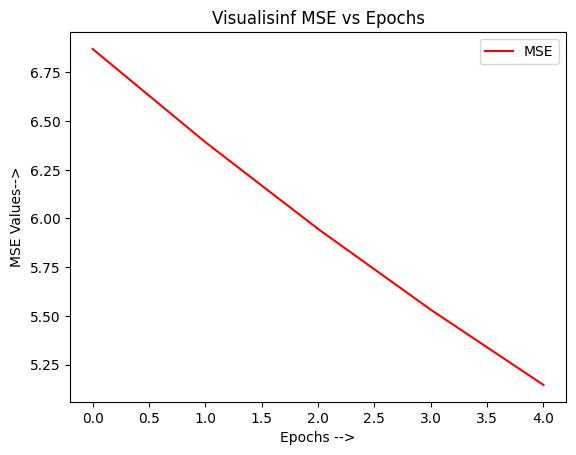

In [ ]:
import matplotlib.pyplot as plt
plt.plot(MSE, label = 'MSE', color='red')
plt.xlabel("Epochs -->")
plt.ylabel("MSE Values-->")
plt.legend()

plt.title("Visualisinf MSE vs Epochs")
plt.show


In [ ]:
ci

0.549399448273563

Optimal parameters:
m -> 1.62552142291135
c -> 0.549399448273563
MSE during training:
Iteration 1: MSE = 4.78586254894357
Iteration 2: MSE = 4.45095862062025
Iteration 3: MSE = 4.13914566305682
Iteration 4: MSE = 3.84884414140930
Iteration 5: MSE = 3.57858213348057


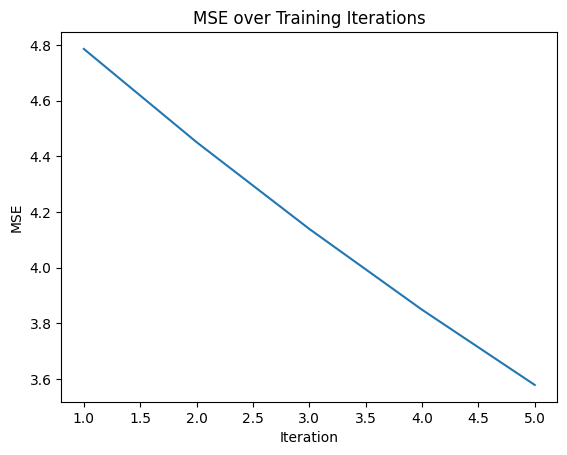

NameError: ignored

In [ ]:
# Step 10: Print optimal parameters
print("Optimal parameters:")
print(f'm -> {mi}')
print(f'c -> {ci}')

# Step 11: Evaluate performance using MSE
print("MSE during training:")
for iter, mse_value in enumerate(MSE):
    print(f'Iteration {iter + 1}: MSE = {mse_value}')

# Step 12: Plot MSE over iterations (optional)
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), MSE)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Training Iterations")
plt.show()

# Step 13: Make predictions on training and test data
y_train_pred = []
for sample in range(len(X_train)):
    xa = X_train[sample, 0]
    ya = Y_train[sample, 0]
    y_pred = mi * xa + ci
    y_train_pred.append(y_pred)

y_test_pred = []
for sample in range(len(X_test)):
    xa = X_test[sample, 0]
    ya = Y_test[sample, 0]
    y_pred = mi * xa + ci
    y_test_pred.append(y_pred)

# Step 14: Plot predicted values vs. actual values for training data
plt.scatter(X_train, Y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Data: Predicted vs. Actual')
plt.legend()
plt.show()

# Step 15: Plot predicted values vs. actual values for test data
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Test Data: Predicted vs. Actual')
plt.legend()
plt.show()
